 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [84]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [85]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")
# YOUR CODE HERE
whale_df = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [86]:
# Count nulls
# YOUR CODE HERE
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [87]:
# Drop nulls
# YOUR CODE HERE
whale_df.dropna(inplace=True)
whale_df.isnull().sum()
# whale_df.head() to double check if dropped first row

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [88]:
# Reading algorithmic returns (add a ../ cuz of how I saved my repo)
algo_returns_csv = Path("../Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_returns_csv,index_col="Date", parse_dates=True)

In [89]:
# Count nulls
# YOUR CODE HERE
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [90]:
# Drop nulls
# YOUR CODE HERE
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [91]:
# Reading S&P 500 Closing Prices (adding ../ cuz of my repo again)
sp500_history_csv = Path("../Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500_df = sp500_df.sort_index(ascending=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [92]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes

Close    object
dtype: object

In [126]:
#fix data type and get rid of $
sp500_df["Close"] = sp500_df["Close"].str.replace('$','')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [132]:
sp500_df.dtypes
sp500_df["Close"] = sp500_df["Close"].astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [134]:
# Calculate Daily Returns
# YOUR CODE HERE

sp_daily = sp500_df.pct_change()
sp_daily

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [137]:
# Drop nulls
# YOUR CODE HERE
sp_daily.isnull().sum()
sp_daily.dropna(inplace=True)
sp_daily.isnull().sum()

Close    0
dtype: int64

In [141]:
# Rename Column
# YOUR CODE HERE

sp_daily.columns = ["SP 500"]

sp_daily

,SP 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [144]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

big_portfolio = pd.concat([algo_df, sp_daily, whale_df], axis="columns", join= "inner")
big_portfolio

,Algo 1,Algo 2,SP 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008589,0.002416,-0.004389,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.000955,0.004323,0.001196,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.004957,-0.011460,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.005447,0.001303,0.003944,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,-0.006945,0.002899,0.000509,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.010301,-0.005228,-0.002274,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,-0.000588,-0.001229,0.001579,0.001448,0.001222,0.000582,0.001916


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

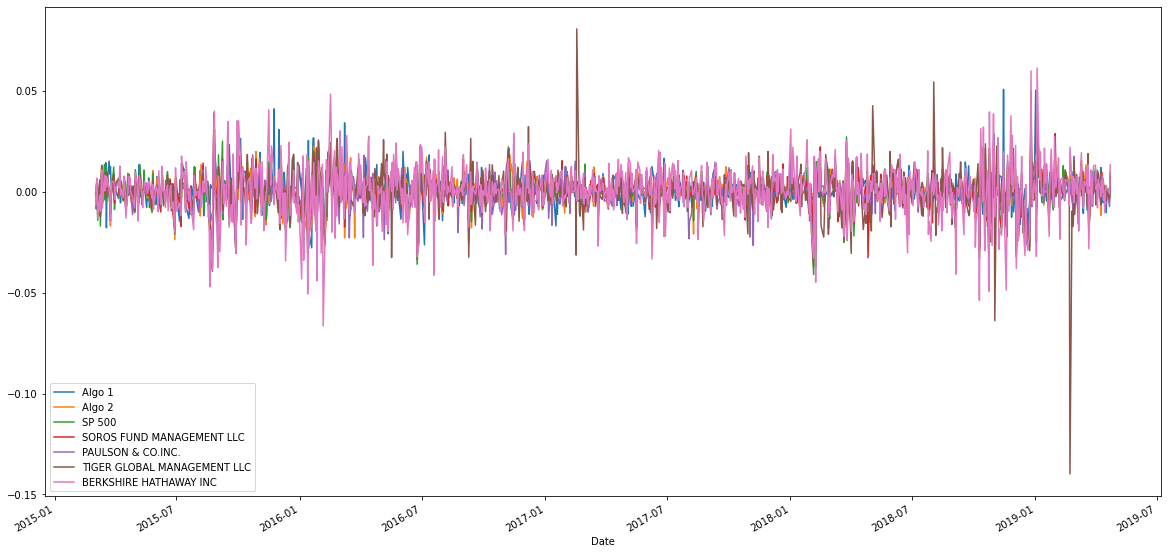

In [148]:
# Plot daily returns
# YOUR CODE HERE
daily_return_plot = big_portfolio.plot(figsize=(20,10))
daily_return_plot

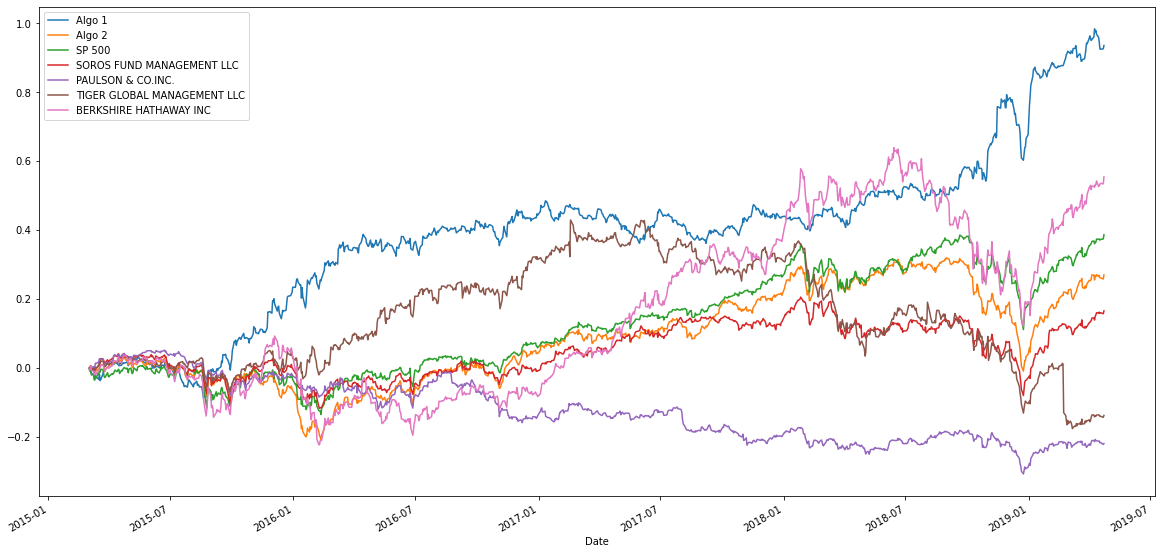

In [156]:
# Plot cumulative returns
# YOUR CODE HERE
cum_returns = (1 + big_portfolio).cumprod()-1
cum_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

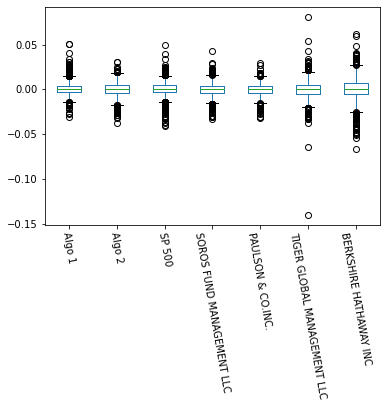

In [180]:
# Box plot to visually show risk
# YOUR CODE HERE
big_portfolio.boxplot(grid=False, rot=100000000, fontsize=10)

In [182]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500? 
# The portfolios with higher standard deviations are the most risky
# YOUR CODE HERE
daily_std_dev = big_portfolio.std()
daily_std_dev

Algo 1                         0.007620
Algo 2                         0.008342
SP 500                         0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [185]:
# ranking of least risky std deviations... #1 being least risky
daily_std_dev.rank(method='min')

Algo 1                         2.0
Algo 2                         4.0
SP 500                         5.0
SOROS FUND MANAGEMENT LLC      3.0
PAULSON & CO.INC.              1.0
TIGER GLOBAL MANAGEMENT LLC    6.0
BERKSHIRE HATHAWAY INC         7.0
dtype: float64

In [198]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
greater_than_SP500 = daily_std_dev[daily_std_dev>daily_std_dev["SP 500"]]
print(greater_than_SP500)

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [211]:
# me trying to be whimsical and failing
for number in daily_std_dev:
    if number > .008554:
        print("You're a risky son of a bitch")
    elif number == .008554:
        print("S&P 500")
    else:
        print("Can I interest you in some government bonds as well?")

Can I interest you in some government bonds as well?
Can I interest you in some government bonds as well?
Can I interest you in some government bonds as well?
Can I interest you in some government bonds as well?
Can I interest you in some government bonds as well?
You're a risky son of a bitch
You're a risky son of a bitch


In [213]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std_dev = big_portfolio.std() * np.sqrt(252)
annual_std_dev

Algo 1                         0.120967
Algo 2                         0.132430
SP 500                         0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [104]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

In [105]:
# Construct a correlation table
# YOUR CODE HERE

In [106]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

In [107]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [108]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [109]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [110]:
# Read the first stock
# YOUR CODE HERE

In [111]:
# Read the second stock
# YOUR CODE HERE

In [112]:
# Read the third stock
# YOUR CODE HERE

In [113]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [114]:
# Reset the index
# YOUR CODE HERE

In [115]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [116]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [117]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [118]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [119]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [120]:
# Risk
# YOUR CODE HERE

In [121]:
# Rolling
# YOUR CODE HERE

In [122]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [123]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [124]:
# Create a correlation analysis
# YOUR CODE HERE

In [125]:
# Beta
# YOUR CODE HERE